# Data Modeling (and Preprocessing)

### Necessary Preprocessing Steps

In [1]:
# Loading Data and making copy just in case

import pandas as pd

df = pd.read_csv("C:/Users/max dore/Desktop/Data3402 kaggle challenge (churn)/train.csv")
df2 = df.copy()

df2.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [2]:
# DROPPING the "Surname" feature. It is not very relevant to predicting churn. (USED)

df2 = df2.drop(columns=['Surname'])

# Dropping CustomerID as well from the data frame. seems like an extension of ID and not very useful to the overall model
# (USED)

df2 = df2.drop(columns=['CustomerId'])

# Dropping 'Id' as well from the data frame. Not very useful to the overall model
# (USED)

df2 = df2.drop(columns=['id'])

In [ ]:
df2.head()

In [3]:
#Applying one-hot coding to gender

import pandas as pd

df2 = pd.get_dummies(df2, columns=['Gender'], prefix='Gen')

In [4]:
#changing bool dtype to float (not sure why it changed to bool) for Gen

for column in df2.columns:
    if column.startswith('Gen_'):
        df2[column] = df2[column].astype(float)

df2.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male
0,668,France,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,1.0
1,627,France,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,1.0
2,678,France,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,1.0
3,581,France,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,1.0
4,716,Spain,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0


In [5]:
#Applying one-hot coding to Geography (also have to change dtype to float from bool)

import pandas as pd


df2 = pd.get_dummies(df2, columns=['Geography'], prefix='Geo')

for column in df2.columns:
    if column.startswith('Geo_'):
        df2[column] = df2[column].astype(float)

df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male,Geo_France,Geo_Germany,Geo_Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,1.0,1.0,0.0,0.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.0,1.0,1.0,0.0,0.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,1.0,1.0,0.0,0.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.0,1.0,1.0,0.0,0.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.0,1.0,0.0,0.0,1.0


In [6]:
#Standardizing the numerical columns that aren't encoded

from sklearn.preprocessing import StandardScaler

# 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'
columns_to_standardize = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

df2[columns_to_standardize] = scaler.fit_transform(df2[columns_to_standardize])


In [7]:
df2.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Female,Gen_Male,Geo_France,Geo_Germany,Geo_Spain
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0,0.0,1.0,1.0,0.0,0.0
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0,0.0,1.0,1.0,0.0,0.0
2,0.268974,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,0,0.0,1.0,1.0,0.0,0.0


# ---------------------------------------------------------------------------------------

# Random Forest

Results:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     39133
           1       0.72      0.54      0.61     10378

    accuracy                           0.86     49511
   macro avg       0.80      0.74      0.76     49511
weighted avg       0.85      0.86      0.85     49511

Accuracy: 0.8582537213952455


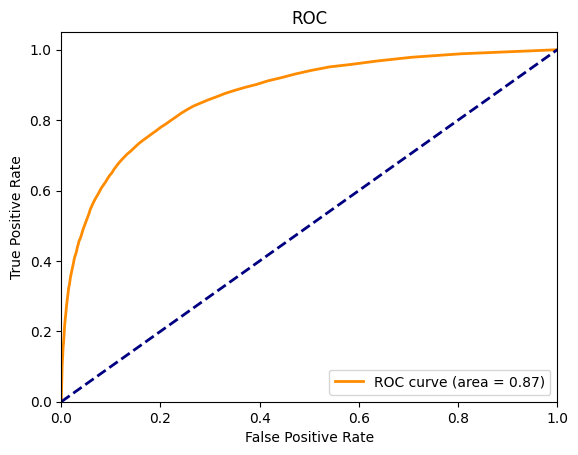

In [8]:
# Implementing Random Forest (no performance enhancements)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

X = df2.drop('Exited', axis=1)
y = df2['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# validation set results
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print("Results:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

#ROC & Graph
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


#### Random Forest did not do too bad. It has quite the grasp on people who ended up staying, though predicting the people leaving could use some work. There was quite a difference in sample sizes between those who churned and those who did not (the two classes of the target variable), so rescaling may be in order.

# ---------------------------------------

# XGBoost

Results:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39133
           1       0.73      0.56      0.63     10378

    accuracy                           0.86     49511
   macro avg       0.81      0.75      0.77     49511
weighted avg       0.86      0.86      0.86     49511

Accuracy: 0.8641917957625578


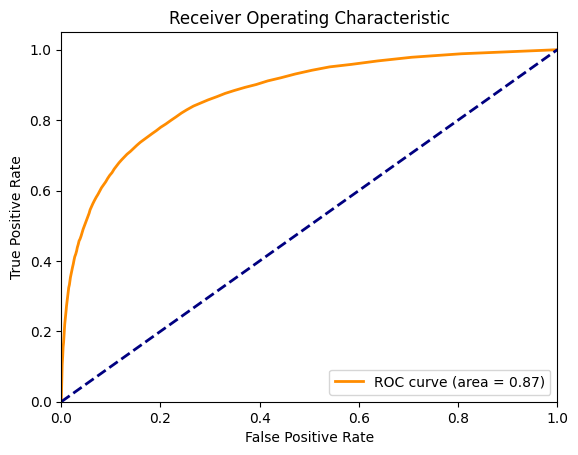

In [11]:
# Implementing XGB (no performance enhancements)

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

X = df2.drop('Exited', axis=1)
y = df2['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_train, y_train)

#validation set results
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print("Results:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

#ROC and Graph
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Overall, XGB performed about the same as Random Forest, though I will say ever-so-slightly better (insignificantly better unfortunately). XGB outperformed Random Forest slightly in both areas, getting high marks for accuracy regarding those who stayed, and gaining average or slightly above average marks for those who left. Once again there is a large disparity in sample sizes, so rescaling may be in order.

# ---------------------------------------

# Decision Tree

Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     39133
           1       0.52      0.54      0.53     10378

    accuracy                           0.80     49511
   macro avg       0.70      0.70      0.70     49511
weighted avg       0.80      0.80      0.80     49511

Accuracy: 0.7977217184060108


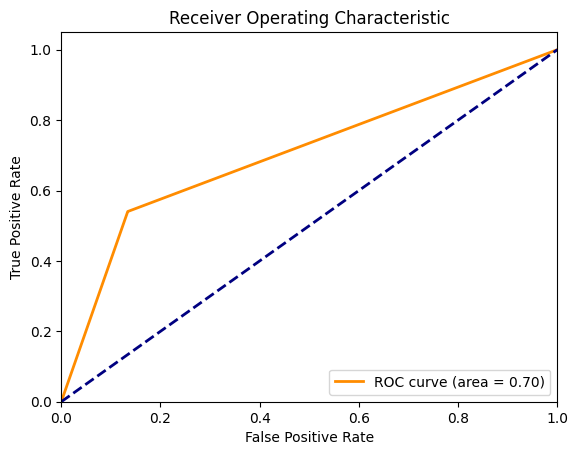

In [12]:
# Implementing XGB (no performance enhancements)

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

X = df2.drop('Exited', axis=1)
y = df2['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

# validation set results
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print("Results:")
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

# ROC & Graph
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### While Decision Tree did perform somewhat well with an accuracy of about .80, it was noticeably less suited to this dataset than XGB and Random Forest. It had similar rates of recall for the negative class as the other two classifiers, however it did significantly worse in both precision, accuracy, and ROC. Nonetheless, the same effects of a disparity in sample size affected this classifier as well.

# ---------------------------------------

# Final Thoughts

#### I will be trying to increase the efficiency of XGB, as it has proven to be the best overall without performance enhancements, even if only slightly. However, all three algorithms did need quite a bit of work when it comes to predicting the positive class.